#Import Library

melakukan import lib yang akan digunakan

In [108]:
from zipfile import ZipFile
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from keras import layers
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

#Import kaggle 

menginstall kaggle 

In [109]:
pip install -q kaggle

data loading

In [110]:
import os
os.environ['KAGGLE_USERNAME'] = "alpiansyahrizqi"
os.environ['KAGGLE_KEY'] = "4ec2871806d4a125d51415bdc1e5a75a"

mengunduh dataset diabetes

In [111]:
!kaggle datasets download -d CooperUnion/anime-recommendations-database

anime-recommendations-database.zip: Skipping, found more recently modified local copy (use --force to force download)


mengekstrak file zip yang telah diunduh

In [112]:
!unzip -q anime-recommendations-database.zip -d .

replace ./anime.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./rating.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


#Import dataset

Import dataset kedalam variable

In [113]:
df_anime = pd.read_csv('/content/anime.csv')
df_rating = pd.read_csv('/content/rating.csv')

#Univariate Exploratory Data Analysis

melihat 5 data teratas pada dataset anime

In [114]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


melihat total data anime

In [115]:
print('Jumlah data anime: ', len(df_anime['anime_id'].unique()))

Jumlah data anime:  12294


melihat jumlah genre anime pada dataset

Jumlah genre anime:  83


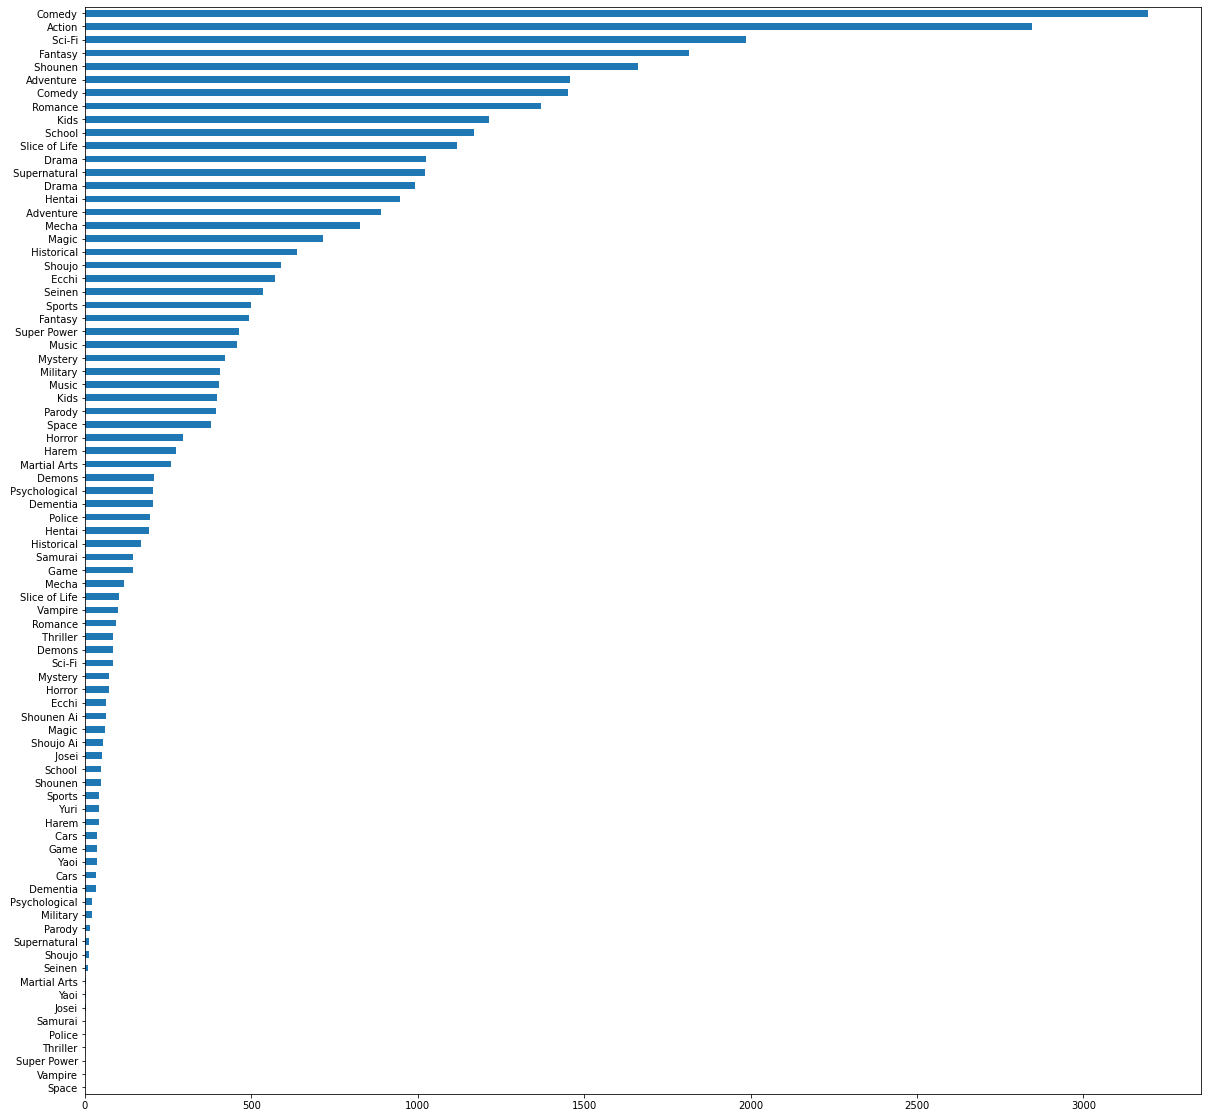

In [116]:
genres = df_anime['genre'].str.split(',').explode()

print('Jumlah genre anime: ', len(genres.unique()))
genres.value_counts(ascending=True).plot(kind='barh', figsize=(20, 20))

melihat 5 data teratas pada dataset rating

In [117]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


melihat lagi dataset rating 

In [118]:
print('Jumlah user yang memberikan penilaian: ', len(df_rating['user_id'].unique()))
print('Jumlah anime yang pernah dinilai user: ', len(df_rating['anime_id'].unique()))
print('Jumlah data penilaian anime: ', len(df_rating))

Jumlah user yang memberikan penilaian:  73515
Jumlah anime yang pernah dinilai user:  11200
Jumlah data penilaian anime:  7813737


Hanya mengambil 5000 jumlah data

In [119]:
df_rating = df_rating.drop(range(20000, 7813737))
df_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
19995,247,3044,7
19996,247,3437,8
19997,247,3481,7
19998,247,3572,7


melihat deskripsi pada dataset rating 

In [120]:
df_rating.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,20000.0,122.93475,76.474535,1.0,51.0,123.0,196.0,247.0
anime_id,20000.0,10462.25390,8995.668737,1.0,2034.0,9074.0,16512.0,34240.0
rating,20000.0,6.10085,3.852638,-1.0,5.0,8.0,9.0,10.0


mengubah nilai rating -1 ke dalam NaN

In [121]:
df_rating["rating"].replace({-1: np.nan}, inplace=True)
df_rating

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN
...,...,...,...
19995,247,3044,7.0
19996,247,3437,8.0
19997,247,3481,7.0
19998,247,3572,7.0


jika ada nilai NA, menghapus baris atau kolom itu.

In [122]:
df_rating = df_rating.dropna(axis = 0, how ='any')
df_rating

,user_id,anime_id,rating
47,1,8074,10.0
81,1,11617,10.0
83,1,11757,10.0
101,1,15451,10.0
153,2,11771,10.0
...,...,...,...
19995,247,3044,7.0
19996,247,3437,8.0
19997,247,3481,7.0
19998,247,3572,7.0


menghitung jumlah data null pada df_anime

In [123]:
df_anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

menghitung jumlah data null df_rating

In [124]:
df_rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

mengatasi data kosong dengan cara menghapusnya 

In [125]:
df_anime =  df_anime.dropna()
df_anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

# Content Based Filtering

TF-IDF Vectorizer

In [126]:
tf = TfidfVectorizer()
tf.fit(df_anime['genre']) 

TfidfVectorizer()

membuat matrik

In [127]:
tfidf_matrix = tf.fit_transform(df_anime['genre']) 

tfidf_matrix.shape

(12017, 47)

return representasi matriks padat dari matriks ini.

In [128]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29498527, 0.3162867 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.2516182 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Membuat dataframe untuk melihat tf-idf matrix

In [129]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df_anime.name
).sample(22, axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ai,game,life,military,kids,shoujo,supernatural,school,sports,ecchi,...,hentai,police,space,slice,yaoi,super,yuri,fantasy,samurai,josei
name,,,,,,,,,,,,,,,,,,,,,
Human Crossing,0.000000,0.0,0.435349,0.0,0.000000,0.00000,0.000000,0.0,0.542716,0.000000,...,0.0,0.0,0.0,0.435349,0.0,0.0,0.0,0.000000,0.0,0.0
Mori no Ongakudan,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Tsuru ni Notte: Tomoko no Bouken,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Idol Fight Suchie-Pai 2,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.848080,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Shakugan no Shana: Friagne to Marianne no Naze Nani Shana! Nandemo Shitsumonbako!,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.723731,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.556359,0.0,0.0
Akuma no Riddle: Shousha wa Dare? Nukiuchi Test,0.660508,0.0,0.000000,0.0,0.000000,0.46067,0.000000,0.0,0.000000,0.463252,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Sekai Monoshiri Ryoko,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Subarashii Sekai Ryokou: Alaska no Tabi &quot;Daigo Hyougaki&quot;,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Pokemon Diamond &amp; Pearl,0.000000,0.0,0.000000,0.0,0.523349,0.00000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.464642,0.0,0.0


**Cosine Similarity**
Menghitung cosine similarity pada matrix tf-idf

In [130]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.14715318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14715318, 1.        , 0.17877808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17877808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

* Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama anime
* Melihat similarity matrix pada setiap resto

In [131]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_anime['name'], columns=df_anime['name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(20, axis=0)

Shape: (12017, 12017)


name,Rasen Sokou no Dystopia,Pic-lele,Ashita Kirarin,Shounen Maid Kuuro-kun: Tenshi no Uta,SKET Dance: SD Character Flash Anime
name,,,,,
Petit Manga,0.0,0.0,0.000000,0.00000,0.000000
Tekken,0.0,0.0,0.000000,0.00000,0.000000
Ba La La Xiao Mo Xian Zhi: Qiji Wubu,0.0,0.0,0.000000,0.00000,0.137615
Kotoura-san: Haruka no Heya,0.0,0.0,0.000000,0.00000,0.796701
Norakuro Nitouhei: Kyouren no Maki,0.0,0.0,0.000000,0.00000,0.000000
Violence Gekiga Shin David no Hoshi: Inma Densetsu,1.0,0.0,0.000000,0.44672,0.000000
Towa no Quon 5: Souzetsu no Raifuku,0.0,0.0,0.000000,0.00000,0.000000
Fly,0.0,0.0,0.000000,0.00000,0.000000
Spectral Force,0.0,0.0,0.000000,0.00000,0.000000


Rekomendasi anime berdasarkan kemiripan dataframe

In [132]:
import tensorflow as tf

def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=df_anime[['name', 'genre']], k=5):
    
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(nama_anime, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Uji Coba

In [133]:
df_anime[df_anime.name.eq('Boku no Hero Academia')]

,anime_id,name,genre,type,episodes,rating,members
178,31964,Boku no Hero Academia,"Action, Comedy, School, Shounen, Super Power",TV,13,8.36,282002


hasil uji coba

In [134]:
result = anime_recommendations('Boku no Hero Academia')
result

,name,genre
0,Boku no Hero Academia: Jump Festa 2016 Special,"Action, Comedy, School, Shounen, Super Power"
1,Kill la Kill,"Action, Comedy, School, Super Power"
2,Kill la Kill Special,"Action, Comedy, School, Super Power"
3,Code:Breaker,"Action, Comedy, School, Shounen, Super Power, ..."
4,Katekyo Hitman Reborn!,"Action, Comedy, Shounen, Super Power"


presisi darin model yang dibuat

In [135]:
a = 0

for row in result.itertuples():
  if (row.genre == 'Action', 'Comedy', 'School', 'Shounen', 'Super Power'):
    a += 1

precision = (a/5)*100
print("presisi darin model yang dibuat {}%".format(precision))

presisi darin model yang dibuat 100.0%


# Collaborative Based Filtering

membuat dataset baru

In [136]:
df = df_rating

Encoding

In [137]:
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228,

* Mengubah anime_id menjadi list tanpa nilai yang sama
* Melakukan proses encoding anime_id
* Melakukan proses encoding angka ke anime_id

In [138]:
anime_ids = df['anime_id'].unique().tolist()

anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}

anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

Mapping user_id dan anime_id kedalam dataframe user dan anime 

In [139]:
df['user'] = df['user_id'].map(user_to_user_encoded)

df['anime'] = df['anime_id'].map(anime_to_anime_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until




*   Mendapatkan jumlah user
*   Mendapatkan jumlah rating
*   Mengubah rating menjadi nilai float
* melihat Nilai minimum rating
* melihat Nilai maksimal rating



In [140]:
num_users = len(user_to_user_encoded)
print(num_users)

num_anime = len(anime_encoded_to_anime)
print(num_anime)

min_rating = min(df['rating'])

max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

234
2666
Number of User: 234, Number of Anime: 2666, Min Rating: 1.0, Max Rating: 10.0


 Mengacak dataset

In [141]:
df = df.sample(frac=1, random_state=42)
df

,user_id,anime_id,rating,user,anime
19989,247,2559,7.0,233,2659
13867,177,21085,10.0,167,458
355,5,392,7.0,3,143
2315,21,572,9.0,17,746
9705,123,10418,7.0,116,1061
...,...,...,...,...,...
17133,219,10620,10.0,208,584
7370,84,908,9.0,78,1561
1110,7,30365,7.0,4,677
19806,245,25099,8.0,231,1339


membagi data train dan validasi dengan komposisi 80:20

In [142]:
x = df[['user', 'anime']].values

y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 233 2659]
 [ 167  458]
 [   3  143]
 ...
 [   4  677]
 [ 231 1339]
 [ 115  870]] [0.66666667 1.         0.66666667 ... 0.66666667 0.77777778 0.88888889]


Fungsi Rekomendasi

In [143]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.anime_embedding = layers.Embedding(
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1)
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    anime_vector = self.anime_embedding(inputs[:, 1])
    anime_bias = self.anime_bias(inputs[:, 1])
 
    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2) 
 
    x = dot_user_anime + user_bias + anime_bias
    
    return tf.nn.sigmoid(x)

Compile Model

In [144]:
model = RecommenderNet(num_users, num_anime, 50)
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Training Model

In [145]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)


Epoch 1/100
1599/1599 [==============================] - 9s 5ms/step - loss: 0.6167 - root_mean_squared_error: 0.2583 - val_loss: 0.5384 - val_root_mean_squared_error: 0.1763
Epoch 2/100
1599/1599 [==============================] - 8s 5ms/step - loss: 0.5292 - root_mean_squared_error: 0.1653 - val_loss: 0.5339 - val_root_mean_squared_error: 0.1710
Epoch 3/100
1599/1599 [==============================] - 8s 5ms/step - loss: 0.5183 - root_mean_squared_error: 0.1527 - val_loss: 0.5253 - val_root_mean_squared_error: 0.1616
Epoch 4/100
1599/1599 [==============================] - 10s 6ms/step - loss: 0.5119 - root_mean_squared_error: 0.1452 - val_loss: 0.5231 - val_root_mean_squared_error: 0.1599
Epoch 5/100
1599/1599 [==============================] - 8s 5ms/step - loss: 0.5081 - root_mean_squared_error: 0.1408 - val_loss: 0.5176 - val_root_mean_squared_error: 0.1538
Epoch 6/100
1599/1599 [==============================] - 8s 5ms/step - loss: 0.5051 - root_mean_squared_error: 0.1371 - val_

Visualisasi Metrik

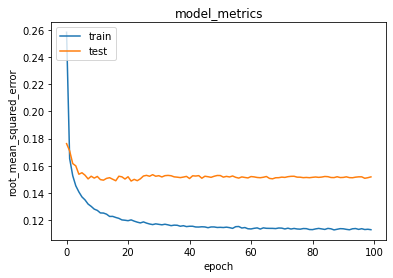

In [146]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Mendapatkan Rekomendasi Resto

In [147]:
anime_df = df_anime
df = df_rating

userID = df.user_id.sample(1).iloc[0]
anime_watched_by_user = df[df.user_id == userID]
 
anime_not_watched = anime_df[~anime_df['anime_id'].isin(anime_watched_by_user.anime_id.values)]['anime_id'] 
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_to_anime_encoded.keys()))
)
 
anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(userID)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

memperoleh rekomendasi anime

In [148]:
from tensorflow import keras

ratings = model.predict(user_anime_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(userID))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)
 
top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)
 
anime_df_rows = anime_df[anime_df['anime_id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.name, ':', row.genre)
 
print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)
 
recommended_anime = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.name, ':', row.genre)

Showing recommendations for users: 104
Anime with high ratings from user
--------------------------------
Code Geass: Hangyaku no Lelouch R2 : Action, Drama, Mecha, Military, Sci-Fi, Super Power
Phantom: Requiem for the Phantom : Action, Drama, Seinen, Thriller
High School DxD New : Action, Comedy, Demons, Ecchi, Harem, Romance, School
Elfen Lied : Action, Drama, Horror, Psychological, Romance, Seinen, Supernatural
Campione!: Matsurowanu Kamigami to Kamigoroshi no Maou : Comedy, Ecchi, Fantasy, Harem, Magic, Romance
--------------------------------
Top 10 anime recommendation
--------------------------------
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Cross Game : Comedy, Drama, Romance, School, Sports
SKET Dance : Comedy, School, Shounen
Kimi to Boku. 2 : Comedy, Drama, Romance, School, Shounen, Slice of Life
Katekyo Hitman Reborn! Special : Comedy, Shounen
Pokemon Black and White 2: Introduction Movie : Action, Fa